## Install Transformers

In [1]:
%%bash
pip install transformers 

## Training

### Seed All

In [2]:
import random
import numpy as np
import torch

def seed_all(seed_value):
    random.seed(seed_value) # Python
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

seed = 42

seed_all(seed)

### Read training data

In [3]:
path =  ""

In [7]:
import pandas as pd

df = pd.read_csv(path+"/sentiment-analysis-on-movie-reviews/train.tsv", sep = "\t")

### Remove Duplicates

In [8]:
df.drop_duplicates(subset=["SentenceId"], keep="first", inplace=True)

In [9]:
df.head()

PhraseId  ...  Sentiment
0           1  ...          1
63         64  ...          4
81         82  ...          1
116       117  ...          3
156       157  ...          1

[5 rows x 4 columns]

### Plot Classes

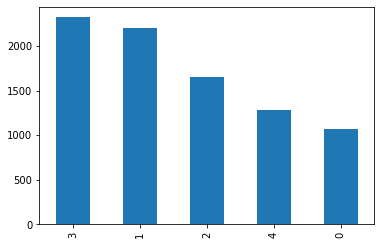

In [10]:
# 0 - negative
# 1 - somewhat negative
# 2 - neutral
# 3 - somewhat positive
# 4 - positive

df["Sentiment"].value_counts().plot(kind="bar")

In [11]:
df.head()

PhraseId  ...  Sentiment
0           1  ...          1
63         64  ...          4
81         82  ...          1
116       117  ...          3
156       157  ...          1

[5 rows x 4 columns]

### Convert text lowercase

In [12]:
df["Phrase"] = df["Phrase"].apply(lambda x: x.lower())

In [13]:
df.head()

PhraseId  ...  Sentiment
0           1  ...          1
63         64  ...          4
81         82  ...          1
116       117  ...          3
156       157  ...          1

[5 rows x 4 columns]

In [14]:
X = df["Phrase"].values 
y = df["Sentiment"].values 

### Split data -> training-validation

In [16]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=.2, random_state=seed)

In [17]:
train_x

array(["the good thing -- the only good thing -- about extreme ops is that it 's so inane that it gave me plenty of time to ponder my thanksgiving to-do list .",
       'a small gem of a movie that defies classification and is as thought-provoking as it is funny , scary and sad .',
       'the jokes are sophomoric , stereotypes are sprinkled everywhere and the acting ranges from bad to bodacious .',
       ...,
       "graphic sex may be what 's attracting audiences to unfaithful , but gripping performances by lane and gere are what will keep them awake .",
       "this is as lax and limp a comedy as i 've seen in a while , a meander through worn-out material .",
       "the leanest and meanest of solondz 's misanthropic comedies ."],
      dtype=object)

### Tokenizer

In [18]:
from transformers import BertTokenizerFast

model_name = "bert-base-uncased"

tokenizer = BertTokenizerFast.from_pretrained(model_name)

In [19]:
train_encodings = tokenizer(list(train_x), truncation=True, padding=True)
val_encodings = tokenizer(list(val_x), truncation=True, padding=True)

In [20]:
train_encodings 

{'input_ids': [[101, 1996, 2204, 2518, 1011, 1011, 1996, 2069, 2204, 2518, 1011, 1011, 2055, 6034, 23092, 2003, 2008, 2009, 1005, 1055, 2061, 27118, 2638, 2008, 2009, 2435, 2033, 7564, 1997, 2051, 2000, 29211, 2026, 15060, 2000, 1011, 2079, 2862, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1037, 2235, 17070, 1997, 1037, 3185, 2008, 13366, 3111, 5579, 1998, 2003, 2004, 2245, 1011, 4013, 22776, 2004, 2009, 2003, 6057, 1010, 12459, 1998, 6517, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1996, 13198, 2024, 2061, 8458, 19506, 7277, 1010, 22807, 2024, 11867, 6657, 19859, 7249, 1998, 1996, 3772, 8483, 2013, 2919, 2000, 8945, 2850, 18436, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [21]:
val_encodings 

{'input_ids': [[101, 2066, 1037, 10225, 25318, 3185, 2007, 2540, 1010, 14593, 9306, 2003, 26502, 6851, 1010, 13366, 14626, 6472, 1998, 12580, 20998, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1996, 2601, 1998, 8618, 26760, 15558, 9792, 5683, 4326, 2004, 2477, 2735, 11808, 1998, 13800, 2076, 1996, 2345, 2353, 1997, 1996, 2143, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1996, 2524, 1011, 2000, 1011, 16014, 1998, 7078, 6827, 6370, 2090, 1996, 2091, 1011, 2000, 1011, 3011, 25200, 1998, 1996, 2512, 18598, 4630, 3946, 16481, 2000, 2022, 8742, 2389, 1010, 1998, 2673, 20437, 2229, 1999, 2023, 11552, 4024, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2016, 1005, 1055, 2025, 2664, 2019, 3883, 1010, 2025, 3243, 1037, 3220, 1012, 1012, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Define Dataset Class

In [22]:
import torch

class MovieDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MovieDataset(train_encodings, train_y)
val_dataset = MovieDataset(val_encodings, val_y)

## Fine-tuning with native PyTorch

In [ ]:
from transformers import BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader
import numpy as np
from tqdm.notebook import tqdm

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

n_labels = 5

model = BertForSequenceClassification.from_pretrained(model_name, num_labels = n_labels)
model.to(device)
model.train()

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

optim = AdamW(model.parameters(), lr=5e-5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
torch.cuda.empty_cache()

for epoch in range(3):
    all_loss = []
    for _, batch in enumerate(tqdm(train_loader)):
        optim.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0] 
        all_loss.append(loss.item()) 
        loss.backward() 
        optim.step() 
    print(f"epoch loss: {np.mean(all_loss)}") 


epoch loss: 1.2414198894690573



epoch loss: 0.9218889345748642



epoch loss: 0.6708169892186024


## Fine-tuning with Trainer

In [23]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir=path+'/results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=427,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir=path+'/logs',            # directory for storing logs
    logging_steps=200,
    seed = seed,
)

n_labels = 5

model = BertForSequenceClassification.from_pretrained(model_name, num_labels = n_labels)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

trainer.train()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

TrainOutput(global_step=2135, training_loss=0.7362363426690917, metrics={'train_runtime': 1335.9822, 'train_samples_per_second': 1.598, 'total_flos': 113042193040800.0, 'epoch': 5.0, 'init_mem_cpu_alloc_delta': 1063776256, 'init_mem_gpu_alloc_delta': 439081472, 'init_mem_cpu_peaked_delta': 0, 'init_mem_gpu_peaked_delta': 0, 'train_mem_cpu_alloc_delta': -226381824, 'train_mem_gpu_alloc_delta': 1339136000, 'train_mem_cpu_peaked_delta': 334434304, 'train_mem_gpu_peaked_delta': 1029899776})

## Save model and tokenizer

In [24]:
model.save_pretrained(path+"trained")
tokenizer.save_pretrained(path+"trained")

('/content/drive/MyDrive/NLP Transformers/Sentiment Analysis/Movie Reviews Sentiment Analysis Project/trained/tokenizer_config.json',
 '/content/drive/MyDrive/NLP Transformers/Sentiment Analysis/Movie Reviews Sentiment Analysis Project/trained/special_tokens_map.json',
 '/content/drive/MyDrive/NLP Transformers/Sentiment Analysis/Movie Reviews Sentiment Analysis Project/trained/vocab.txt',
 '/content/drive/MyDrive/NLP Transformers/Sentiment Analysis/Movie Reviews Sentiment Analysis Project/trained/added_tokens.json',
 '/content/drive/MyDrive/NLP Transformers/Sentiment Analysis/Movie Reviews Sentiment Analysis Project/trained/tokenizer.json')

## Testing

In [25]:
path = ""

In [30]:
import pandas as pd
from transformers import BertTokenizerFast, BertForSequenceClassification

tokenizer = BertTokenizerFast.from_pretrained(path+"trained")
model = BertForSequenceClassification.from_pretrained(path+"trained")

df_test = pd.read_csv(path+"/sentiment-analysis-on-movie-reviews/test.tsv", sep = "\t") 

In [31]:
df_test.drop_duplicates(["SentenceId"], inplace=True) 

In [32]:
df_test["Phrase"] = df_test["Phrase"].apply(lambda x: x.lower()) 

In [33]:
test_x = df_test["Phrase"]

In [34]:
test_encodings = tokenizer(test_x.to_list(), truncation=True, padding=True) 

In [35]:
df_test.head()

PhraseId  SentenceId                                             Phrase
0      156061        8545  an intermittently pleasing but mostly routine ...
15     156076        8546  kidman is really the only thing that 's worth ...
93     156154        8547  once you get into its rhythm ... the movie bec...
117    156178        8548  i kept wishing i was watching a documentary ab...
158    156219        8549  kinnear does n't aim for our sympathy , but ra...

In [36]:
df_test["Sentiment"] = None

In [37]:
import torch
from torch.utils.data import DataLoader
import numpy as np
from tqdm.notebook import tqdm

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

class MovieDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [38]:
test_dataset = MovieDataset(test_encodings, list(range(len(test_x)))) 

In [43]:
model.to(device)
model.eval()

test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

In [44]:
torch.cuda.empty_cache()

In [45]:
res = torch.zeros(1).to(device)

import torch.nn.functional as F

for _, batch in enumerate(tqdm(test_loader)):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    outputs = model(input_ids, attention_mask=attention_mask)[0]
    percentages = F.softmax(outputs, dim=-1)
    results = torch.argmax(percentages, dim=1)
    res = torch.cat((res, results), 0)


In [46]:
res = res[1:] 
res, res.shape 

(tensor([2., 1., 3.,  ..., 4., 1., 1.], device='cuda:0'), torch.Size([3310]))

In [47]:
predictions = list(res.cpu().detach().numpy()) 
len(predictions) 

3310

In [48]:
df_test["Sentiment"] = [int(i) for i in predictions]  

In [49]:
pd.set_option("display.max_colwidth", None)
df_test[["Phrase","Sentiment"]].head(10)

Phrase  Sentiment
0                                                                                                                                                                                             an intermittently pleasing but mostly routine effort .          2
15   kidman is really the only thing that 's worth watching in birthday girl , a film by the stage-trained jez butterworth -lrb- mojo -rrb- that serves as yet another example of the sad decline of british comedies in the post-full monty world .          1
93                                                                                                                                                                           once you get into its rhythm ... the movie becomes a heady experience .          3
117                                                                                                 i kept wishing i was watching a documentary about the wartime navajos and what they accomplished instead of all this specious hollywood hoo-ha .          1
158                                                                                                                                          kinnear does n't aim for our sympathy , but rather delivers a performance of striking skill and depth .          4
189                                                                                                                                                                           all ends well , sort of , but the frenzied comic moments never click .          1
211                                                                                          it 's a hoot and a half , and a great way for the american people to see what a candidate is like when he 's not giving the same 15-cent stump speech .          3
263                                                                                  the weight of the piece , the unerring professionalism of the chilly production , and the fascination embedded in the lurid topic prove recommendation enough .          2
301                                                                                     the film contains no good jokes , no good scenes , barely a moment when carvey 's saturday night live-honed mimicry rises above the level of embarrassment .          1
344                                                                                                                                   an offbeat , sometimes gross and surprisingly appealing animated film about the true meaning of the holidays .          3

In [50]:
df_test[["Phrase","Sentiment"]].tail(10)

Phrase  Sentiment
66146                                                                                birthday girl is an amusing joy ride , with some surprisingly violent moments .          3
66158                                                                                           at its worst , it implodes in a series of very bad special effects .          0
66169                                                                                                  maybe i found the proceedings a little bit too conventional .          1
66178                                                                         moretti 's compelling anatomy of grief and the difficult process of adapting to loss .          3
66193  montias ... pumps a lot of energy into his nicely nuanced narrative and surrounds himself with a cast of quirky -- but not stereotyped -- street characters .          3
66220                                                   not sweet enough to liven up its predictable story and will leave even fans of hip-hop sorely disappointed .          0
66239                                                                                            nasty , ugly , pointless and depressing , even if you hate clowns .          0
66253        with tightly organized efficiency , numerous flashbacks and a constant edge of tension , miller 's film is one of 2002 's involvingly adult surprises .          4
66280                                                                                                                        they should have called it gutterball .          1
66287                                                                                                                         a long-winded , predictable scenario .          1

## Submission

In [51]:
df_sub = pd.read_csv(path+"/sentiment-analysis-on-movie-reviews/sampleSubmission.csv") 

In [52]:
df_sub = df_sub[df_sub["PhraseId"].isin(list(df_test["PhraseId"].values))] 

In [53]:
df_sub 

PhraseId  Sentiment
0        156061          2
15       156076          2
93       156154          2
117      156178          2
158      156219          2
...         ...        ...
66220    222281          2
66239    222300          2
66253    222314          2
66280    222341          2
66287    222348          2

[3310 rows x 2 columns]

In [54]:
df_sub.loc[:,"Sentiment"] = [int(i) for i in predictions]  

In [55]:
df_sub 

PhraseId  Sentiment
0        156061          2
15       156076          1
93       156154          3
117      156178          1
158      156219          4
...         ...        ...
66220    222281          0
66239    222300          0
66253    222314          4
66280    222341          1
66287    222348          1

[3310 rows x 2 columns]

In [56]:
df_sub.to_csv(path+"/sentiment-analysis-on-movie-reviews/submission.csv") 

## Custom Test

In [57]:
path = ""

In [58]:
from transformers import BertTokenizerFast, BertForSequenceClassification
import torch.nn.functional as F

tokenizer = BertTokenizerFast.from_pretrained(path+"trained")
model = BertForSequenceClassification.from_pretrained(path+"trained")

In [59]:
review = "movie was terrible!"

tokenized_review = tokenizer([review], return_tensors='pt')

probs = model(**tokenized_review)
percentages = F.softmax(probs[0], dim=-1)
res = torch.argmax(percentages, dim=1)
res.item()

0